In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [3]:
all_data = pd.read_csv("resnet56_cifar10.csv")
all_data.head()

,run,operation,started,time,status,label,blocker,data_location,dataset,gpu,...,Sparsity,alignment_score,best_post_acc,best_post_loss,best_pre_acc,best_pre_loss,immediate_post_acc,immediate_post_loss,Accuracy/preprune,Loss/preprune
0,21c3b2dd,main.py,2022-07-04 23:07:19,3:52:10,completed,resnet56_cifar10,none,~/torch_subspace/data/,cifar10,cuda,...,0.8325,39.540722,0.8722,0.426747,0.9321,0.325695,0.1,4.787107,NaN,NaN
1,878d849d,main.py,2022-07-04 23:05:13,3:50:06,completed,resnet56_cifar10,none,~/torch_subspace/data/,cifar10,cuda,...,0.8910,42.774120,0.8232,0.547047,0.9321,0.325695,0.1,5.492399,NaN,NaN
2,775dc0a0,main.py,2022-07-04 22:58:33,3:50:49,completed,resnet56_cifar10,none,~/torch_subspace/data/,cifar10,cuda,...,0.9365,60.800251,0.6975,0.867580,0.9321,0.325695,0.1,9.366464,NaN,NaN
3,3259002d,main.py,2022-07-04 22:58:13,2:49:07,completed,resnet56_cifar10,none,~/torch_subspace/data/,cifar10,cuda,...,0.9682,43.564129,0.4960,1.380620,0.9321,0.325695,0.1,4.804604,NaN,NaN
4,30aba02c,main.py,2022-07-04 22:58:02,2:49:03,completed,resnet56_cifar10,none,~/torch_subspace/data/,cifar10,cuda,...,0.9863,41.050938,0.1000,2.302569,0.9321,0.325695,0.1,4.553076,NaN,NaN


In [4]:
all_data = all_data[["blocker", "pruner", "best_pre_acc", "best_post_acc", "Sparsity", "immediate_post_acc"]]
all_data["acc_drop"] = all_data["best_pre_acc"] - all_data["best_post_acc"]
all_data.head()

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,immediate_post_acc,acc_drop
0,none,magnitude,0.9321,0.8722,0.8325,0.1,0.0599
1,none,magnitude,0.9321,0.8232,0.8910,0.1,0.1089
2,none,magnitude,0.9321,0.6975,0.9365,0.1,0.2346
3,none,magnitude,0.9321,0.4960,0.9682,0.1,0.4361
4,none,magnitude,0.9321,0.1000,0.9863,0.1,0.8321


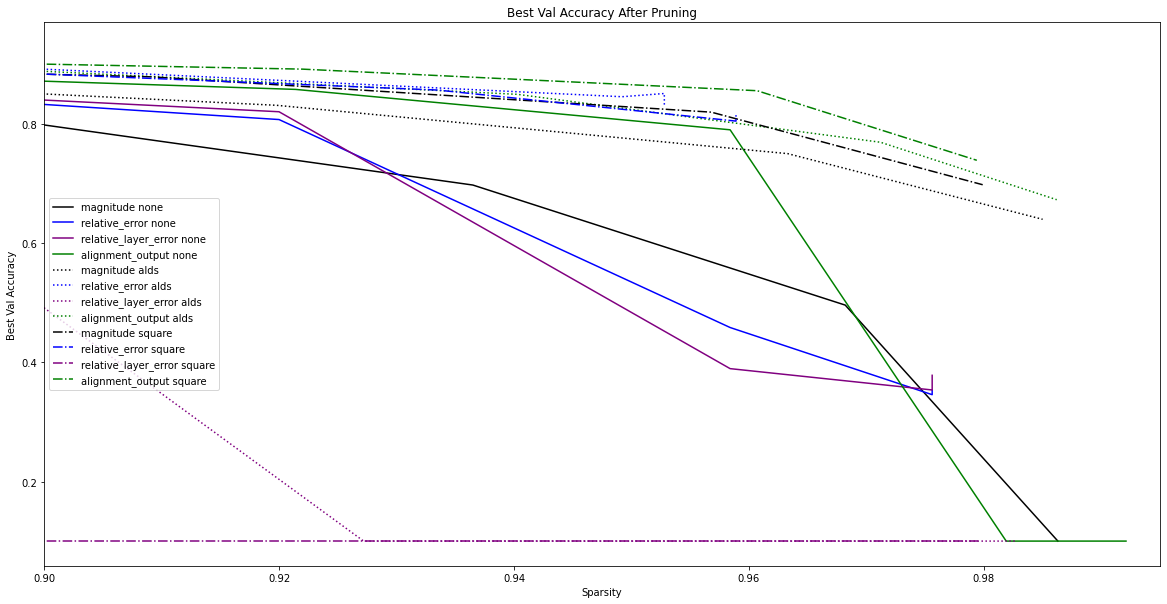

In [5]:
data = all_data[
    (all_data["pruner"] != "alignment_output_sampling_proportional") &
    (all_data["pruner"] != "alignment_output_sampling") &
    (all_data["pruner"] != "alignment_variance") &
    (all_data["pruner"] != "alignment_variance_2")
]
plt.figure(figsize=(20, 10))
blocker_styles = {
    "none": "-",
    "alds": ":",
    "true_alds": "--",
    "square": "-.",
}
pruner_colors = {
    "magnitude": "black",
    "relative_error": "blue",
    "relative_layer_error": "purple",
    "alignment_output": "green",
    "alignment_variance": "purple",
    "alignment_output_sampling": "red",
    # "alignment_output_sampling_proportional": "black"
}
for blocker in data["blocker"].unique():
    b = data[data["blocker"] == blocker]
    for pruner in b["pruner"].unique():
        p = b[b["pruner"] == pruner].sort_values(by="Sparsity")
        color = "red" if blocker == "true_alds" else pruner_colors[pruner]
        plt.plot(
            p["Sparsity"],
            p["best_post_acc"],
            label=f"{pruner} {blocker}",
            linestyle=blocker_styles[blocker],
            color=color
        )
plt.legend()
plt.xlabel("Sparsity")
plt.ylabel("Best Val Accuracy")
# plt.ylim(0.8, 1) 
plt.xlim(0.9, 0.995)
plt.title("Best Val Accuracy After Pruning")
plt.show()
